In [1]:
import sys
sys.path.append('./../../')
from rl.dqn.dqn import get_dqn_cnn_model, get_dqn_mlp_model, get_dqn_multi_model
from stable_baselines3.common.evaluation import evaluate_policy
import pickle

pygame 2.1.0 (SDL 2.0.16, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### DQN

In [6]:
model_cnn = get_dqn_cnn_model()
model_mlp = get_dqn_mlp_model()

In [8]:
mean_reward, std_reward = evaluate_policy(model_cnn, model_cnn.env, n_eval_episodes=10)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:318.00 +/- 146.15


In [11]:
mean_reward, std_reward = evaluate_policy(model_mlp, model_mlp.env, n_eval_episodes=10)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:183.00 +/- 20.76


In [4]:
# Train
rewards = []
stds = []
for i in range(1000):
    print("iteration: ", i+1)
    model.learn(total_timesteps=1)
    mean_reward, std_reward = evaluate_policy(model, model.env, n_eval_episodes=1)
    print(f"   mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")
    
    rewards.append(mean_reward)
    stds.append(std_reward)
    
    # with open("dqn_reward.txt", "wb") as f:   
    #     pickle.dump(rewards, f)
    # with open("dqn_std.txt", "wb") as f:   
    #     pickle.dump(stds, f)
print("   saving...")
model.save("dqn_achtung")
print("   saved")

iteration:  1
   mean_reward:210.00 +/- 0.00
iteration:  2
   mean_reward:275.00 +/- 0.00
iteration:  3
   mean_reward:155.00 +/- 0.00
iteration:  4
   mean_reward:455.00 +/- 0.00
iteration:  5
   mean_reward:130.00 +/- 0.00
iteration:  6
   mean_reward:175.00 +/- 0.00
iteration:  7
   mean_reward:495.00 +/- 0.00
iteration:  8
   mean_reward:150.00 +/- 0.00
iteration:  9
   mean_reward:335.00 +/- 0.00
iteration:  10
   mean_reward:325.00 +/- 0.00
iteration:  11
   mean_reward:225.00 +/- 0.00
iteration:  12
   mean_reward:395.00 +/- 0.00
iteration:  13
   mean_reward:380.00 +/- 0.00
iteration:  14
   mean_reward:310.00 +/- 0.00
iteration:  15
   mean_reward:220.00 +/- 0.00
iteration:  16
   mean_reward:130.00 +/- 0.00
iteration:  17
   mean_reward:200.00 +/- 0.00
iteration:  18
   mean_reward:195.00 +/- 0.00
iteration:  19
   mean_reward:140.00 +/- 0.00
iteration:  20
   mean_reward:150.00 +/- 0.00
iteration:  21
   mean_reward:495.00 +/- 0.00
iteration:  22
   mean_reward:470.00 +/- 0.

In [5]:
# Evaluate the trained policy
model.load("dqn_achtung")
mean_reward, std_reward = evaluate_policy(model, model.env, n_eval_episodes=100)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:299.30 +/- 136.22


### Graphs

In [6]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Q-learning')

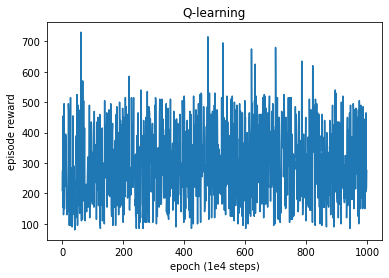

In [7]:
plt.plot(rewards)
plt.xlabel('epoch (1e4 steps)')
plt.ylabel('episode reward')
plt.title('Q-learning')